# 0x0. 用脚本请求商用大模型

## 实验任务
1. 注册智谱清言（GLM3-turbo）、文心一言（ERNIE-Speed）、Minimax或其他大模型服务商账号，获取免费额度。
2. 阅读官方使用文档，撰写 Python 脚本，实现对大模型的API请求（注意跟前端页面请求区分开）。
3. 将脚本包装成一个名为 chat 的函数，便于后续使用。
4. 延申：学会使用 Gradio 或者 Streamlit，搭建一个 Chat-UI（难度稍大）。

## 参考资料
- Minimax：https://platform.minimaxi.com/document/Fast%20access?key=66701cf51d57f38758d581b2
- 智谱清言：https://open.bigmodel.cn/dev/howuse/glm-4
- 文心千帆文档： https://cloud.baidu.com/product-s/qianfan_home

1.智谱官方文档界面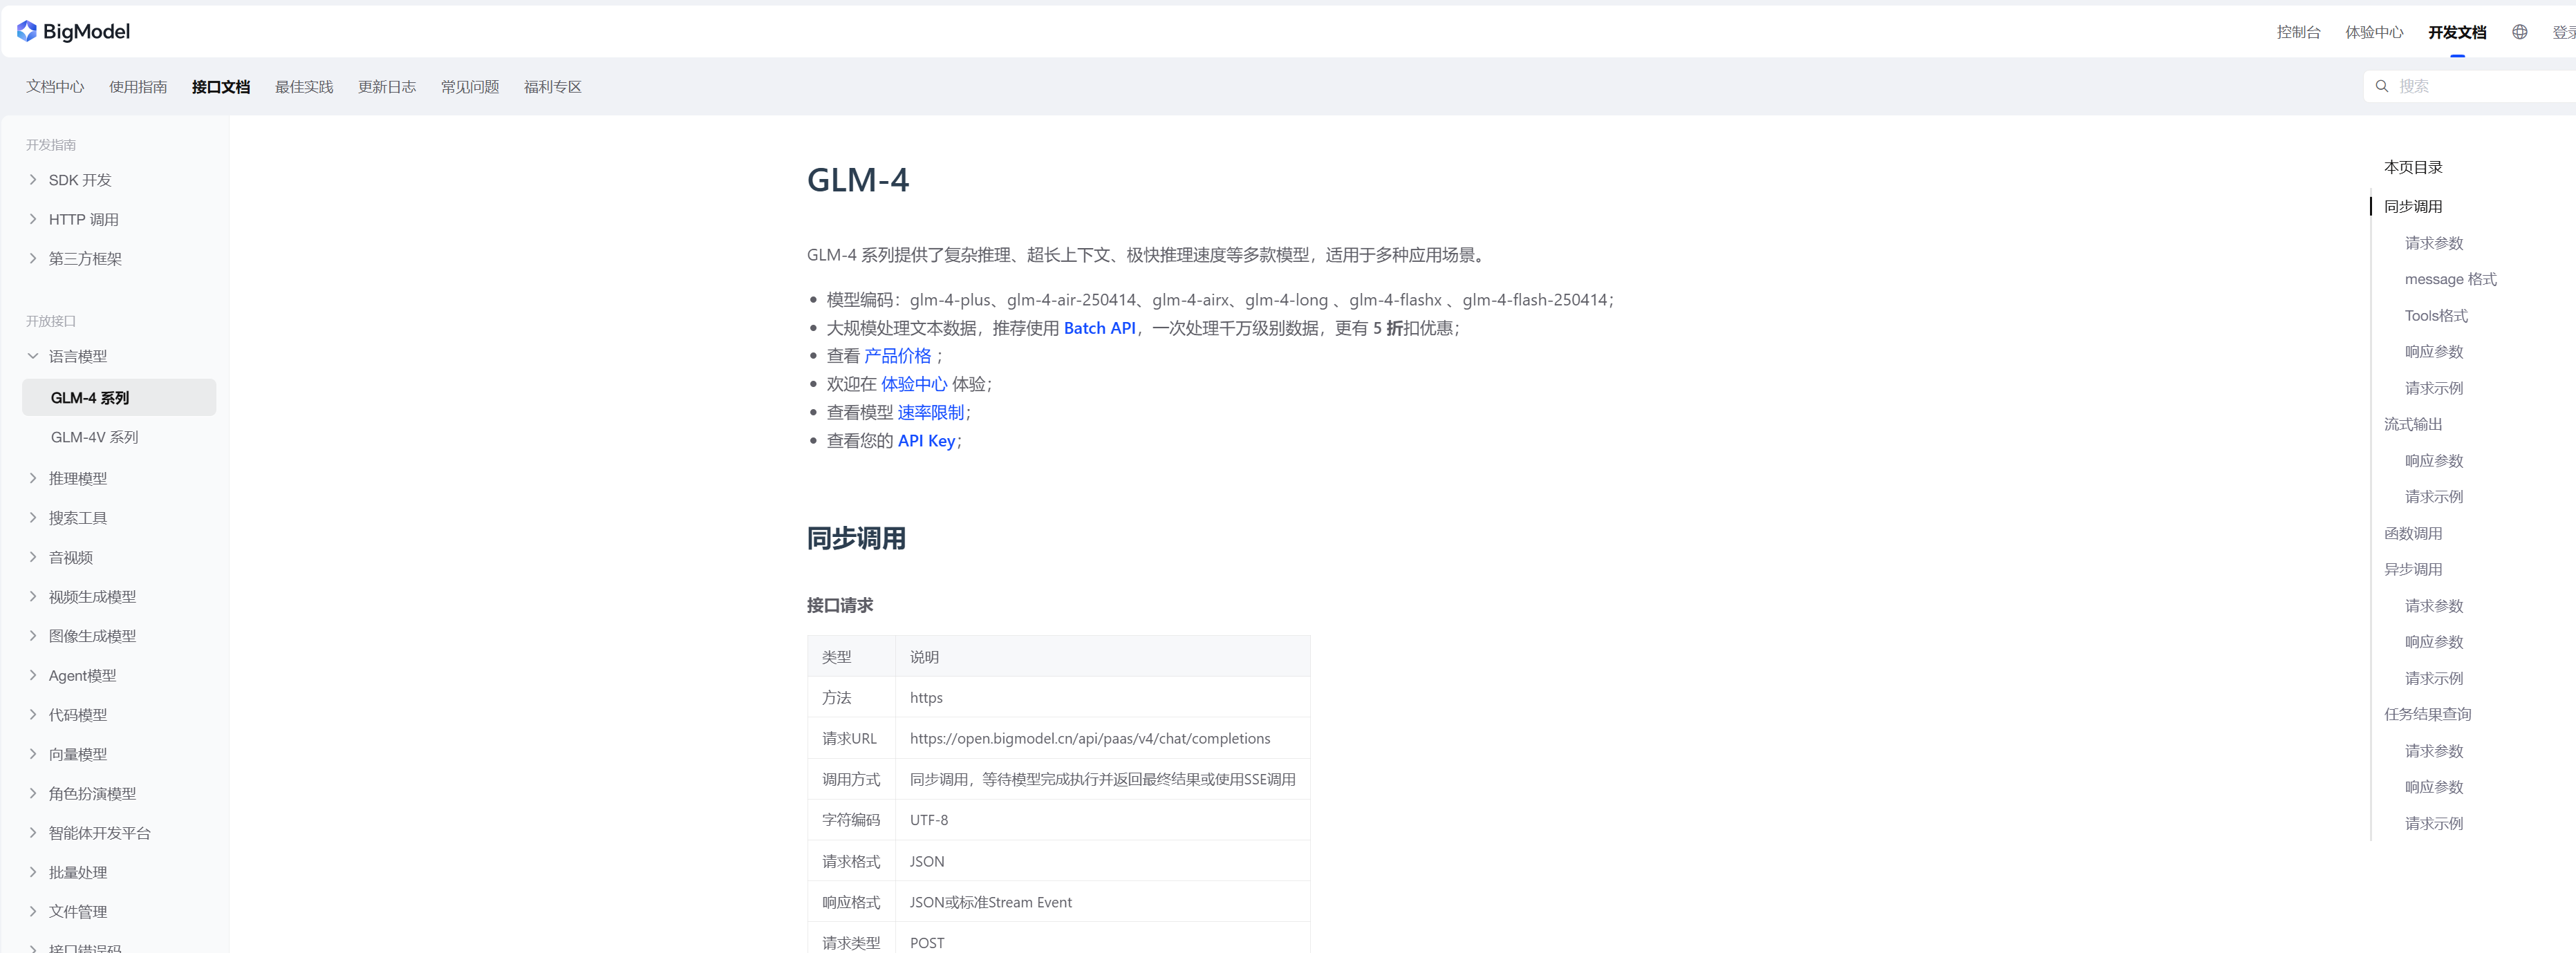  2.密钥管理界面，创建API_KEY进行模型调用 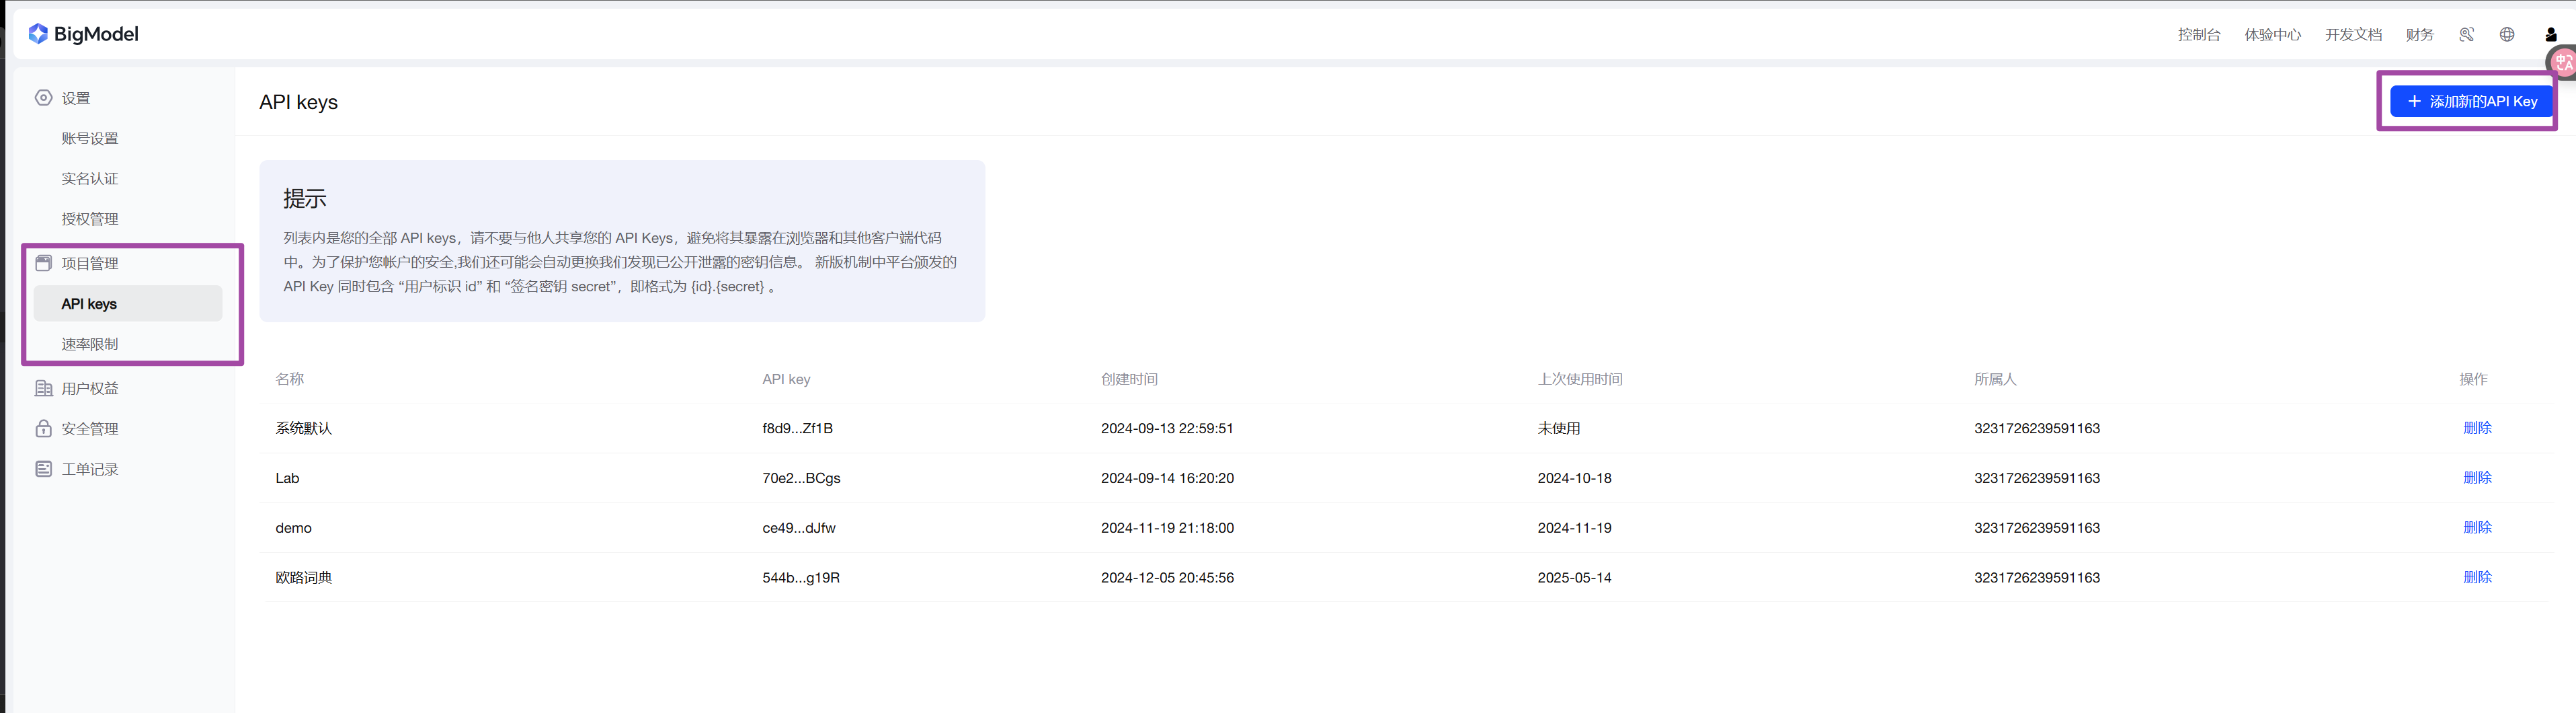

In [2]:
# 0x0. 用脚本请求商用大模型 参考示例（以智谱为例，最基础版本，可以在此版本上加入输入输出处理，以及函数封装）

from zhipuai import ZhipuAI
from dotenv import load_dotenv
import os
load_dotenv()

APIKEY = os.getenv("ZHIPUAPI")

client = ZhipuAI(api_key=APIKEY) # 填写您自己的APIKey
response = client.chat.completions.create(
    model="glm-4-plus",  # 填写需要调用的模型编码
    messages=[  
        {"role": "system", "content": "你是一个乐于解答各种问题的助手，你的任务是为用户提供专业、准确、有见地的建议。"},   #给AI的指令
        {"role": "user", "content": "农夫需要把狼、羊和白菜都带过河，但每次只能带一样物品，而且狼和羊不能单独相处，羊和白菜也不能单独相处，问农夫该如何过河。"} #用户的问题
    ],
)
print(response.choices[0].message)

CompletionMessage(content='这是一个经典的逻辑谜题，通常称为“农夫过河”问题。为了确保狼、羊和白菜都能安全过河，农夫需要遵循以下步骤：\n\n1. **第一次过河**：\n   - 农夫带羊过河，把羊留在对岸。\n\n2. **返回**：\n   - 农夫空手返回原岸。\n\n3. **第二次过河**：\n   - 农夫带狼过河。\n\n4. **返回**：\n   - 农夫把羊带回原岸。\n\n5. **第三次过河**：\n   - 农夫带白菜过河，把白菜留在对岸。\n\n6. **返回**：\n   - 农夫空手返回原岸。\n\n7. **第四次过河**：\n   - 农夫最后带羊过河。\n\n通过以上步骤，农夫可以确保在任何时候狼和羊、羊和白菜都不会单独相处，从而安全地将所有物品带到对岸。\n\n具体步骤总结如下：\n1. 带羊过河。\n2. 空手返回。\n3. 带狼过河。\n4. 带羊返回。\n5. 带白菜过河。\n6. 空手返回。\n7. 带羊过河。\n\n这样，所有物品都安全过河了。', role='assistant', tool_calls=None)


### 0x0. TODO:请完成python代码对大模型API的调用，并封装成一个函数

In [3]:
#0x0 To be Done
def chat(prompt, system_prompt="你是一个乐于解答各种问题的助手，你的任务是为用户提供专业、准确、有见地的建议。"):
    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": prompt}
    ]
    response = client.chat.completions.create(
        model="glm-4-plus",
        messages=messages
    )
    return response.choices[0].message.content

# 示例调用 chat 函数
question = "地球的表面积是多少？"
result = chat(question)
print(result)

地球的表面积大约是510,100,000平方公里（约196,900,000平方英里）。这个数值包括了地球上的陆地和海洋的总面积。具体来说，地球表面的约71%被海洋覆盖，剩余的29%是陆地。地球是一个近似于球形的天体，但由于自转导致的两极稍扁赤道略鼓的椭球形状，其表面积并不是一个完美的球体表面积。这个数值是根据地球的平均半径（大约6,371公里）计算得出的。


# 0x1. 大模型能力评测和上下文学习（In-Context Learning）

## 实验任务
1. 学习大模型能力选择题 Benchmark C-Eval。
2. 理解 0-shot 和 few-shot 的概念。
3. 学会 In-Context Learning。
4. 选择 50 个测试问题，对 0x0 中的大模型进行评测，对比 0-shot 和 5-shot 的结果。

## 参考资料
- C-Eval 主页和测试数据：https://cevalbenchmark.com/index_zh.html
- few-shot learning 少样本提示：https://www.promptingguide.ai/zh

### 1. 学习大模型能力选择题Benchmark C-Eval（Hugging Face下载和教学）： 
C-Eval（Chinese Evaluation）是一个专门设计用于评估大语言模型（LLM）能力的中文基准测试。它包括多个领域的选择题，可以用来评估模型在各种任务中的表现。通过 C-Eval，可以评估大模型在零样本（0-shot）和少量样本（few-shot）学习场景下的推理能力。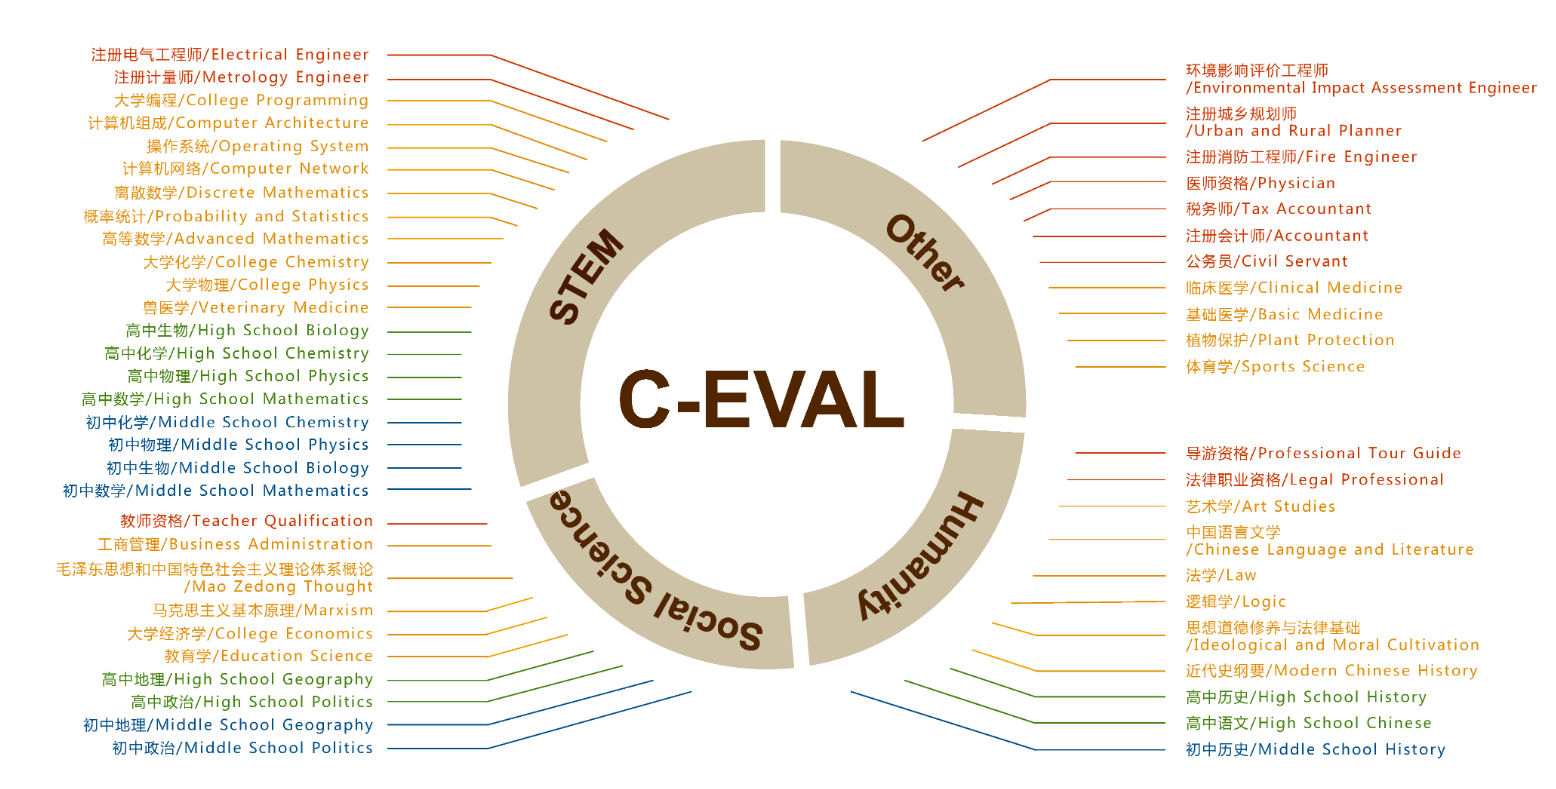

### 2. 理解 0-shot和 few-shot的概念： 
- 0-shot 学习：不提供示例，直接基于问题让大模型推理。
   
        question = "地球的表面积是多少？"   
        result = chat(question)   
        print(result)  
    
    
- few-shot 学习：提供几个示例来给大模型学习和提示。 

        examples = [
        "问题：太阳是怎样发光的？\n回答：通过核聚变反应发光。",   
        "问题：月亮为什么会发光？\n回答：反射太阳光。",   
        "问题：火星的表面积是多少？\n回答：约1.45亿平方公里。",   
        "问题：水星的表面积是多少？\n回答：约7.48千万平方公里。",   
        "问题：金星的表面积是多少？\n回答：约4.60亿平方公里。"   
        ]   
        question = "地球的表面积是多少？"   
        prompt = "\n".join(examples) + "\n 问题：" + question   
        result = chat(prompt)   
        print(result)   
        
        
### 3. 学会 In-Context Learning： 
In-Context Learning 不需要对模型进行额外的显式训练或微调，而是通过向模型提供上下文示例，直接在推理过程中调整模型的行为，即模型能够从输入的上下文中学习，并根据提供的示例推断出所需的模式或规则，概念同few-shot。

### 4. 对比 0—shot和5—shot 结果
选择50个测试问题，对0x0中的大模型进行评测，分别对比Zero—shot和5—shot 的结果，此处以C-Eval的physician_val.csv数据集为例进行评估。 

In [15]:
# 0x1. 0-shot示例（直接对话），请自行补全空缺内容
import os
import pandas as pd
from zhipuai import ZhipuAI
import re

# Step 1: 加载本地C-Eval验证集数据
def load_local_ceval_dataset(path="val/physician_val.csv"):
    dic = path.split("/")
    File_Dir = "ceval-exam"
    test_df = pd.read_csv(os.path.join(File_Dir, dic[0], dic[1]))  
    return test_df

# Step 2: GLM-4模型调用
client_glm4 = ZhipuAI(api_key=APIKEY)  # 填写GLM-4的API密钥

def call_glm4_api(question, choices):

    prompt = f"问题：{question}\n选项：\nA. {choices[0]}\nB. {choices[1]}\nC. {choices[2]}\nD. {choices[3]}\n\n请给出答案："

    # messages = [
    #     {"role": "user", "content": f"问题：{question} 选项：{'，'.join(choices)}"}
    # ]
    
    # response = client_glm4.chat.completions.create(
    #     model="glm-4-plus",  # 填写GLM-4的模型名称
    #     messages=messages
    # )
    
    return chat(prompt)


def check_correctness(model_reply, correct_answer):
    system_prompt = "你是一个判断答案正确与否的助手，你的任务是判断模型的回答是否正确。输入会告诉你模型的回答和真正的正确答案。模型答案正确则回答1，答案错误则回答0。请不要做出解释。"
    prompt = f"模型的回答：{model_reply}\n真正的正确答案：{correct_answer}"
    correctness = chat(prompt, system_prompt)
    print(correctness)
    return int(correctness[0])


# Step 3: 评测逻辑
def evaluate_model_on_ceval(model_call_fn, dataset):
    correct = 0
    total = len(dataset)
    
    for index, row in dataset.iterrows():
        question = row['question']
        choices = [row['A'], row['B'], row['C'], row['D']]
        correct_answer = row['answer']
        
        # 调用模型函数
        model_reply = model_call_fn(question, choices)
        
        correctness = check_correctness(model_reply, correct_answer)
        if correctness:
            correct += 1
        
        print(f"问题：{question}\n选项：\nA. {choices[0]}\nB. {choices[1]}\nC. {choices[2]}\nD. {choices[3]}\n")
        print(f"模型回复：\n{model_reply}\n")
        print(f"正确答案：{correct_answer}\n")
    
    accuracy = correct / total * 100
    print(f"GLM-4 模型在C-Eval val集上的准确率为：{accuracy}%")
    return accuracy

# Step 4: 主函数 - 运行评测
# if __name__ == "__main__":
#     # 加载C-Eval本地验证集数据
#     dataset =  load_local_ceval_dataset() # 填写加载数据集的函数名

#     print("评测 GLM-4 模型:")
#     zeroshot_accuracy = evaluate_model_on_ceval(call_glm4_api, dataset)  # 填写调用GLM-4模型的函数名

###  0x1.TODO: 请参照 0-shot 完成 5-shot 代码编写并进行对比

In [17]:
#0x1 To be Done
import random

# Step 1: 从数据集中选择5个示例作为few-shot示例
def get_few_shot_examples(dataset, num_examples=5):
    """从数据集中随机选择几个示例用于few-shot学习"""
    # 随机选择样例，避免每次选择相同的样例
    sample_indices = random.sample(range(len(dataset)), num_examples)
    examples = []
    
    for idx in sample_indices:
        row = dataset.iloc[idx]
        question = row['question']
        choices = [f"{row['A']}", f"{row['B']}", f"{row['C']}", f"{row['D']}"]
        answer = row['answer']
        
        # 构建示例格式
        example = f"问题：{question}\n选项：\nA. {choices[0]}\nB. {choices[1]}\nC. {choices[2]}\nD. {choices[3]}\n答案：{answer}"
        examples.append(example)
    print(f"选取的5个示例：{examples}")
    return examples

# Step 2: 构建5-shot GLM-4模型调用函数
def call_glm4_api_5shot(question, choices, examples):
    # 构建包含示例的提示信息
    few_shot_prompt = "\n\n".join(examples)
    
    # 添加当前问题
    full_prompt = f"{few_shot_prompt}\n\n问题：{question}\n选项：\nA. {choices[0]}\nB. {choices[1]}\nC. {choices[2]}\nD. {choices[3]}\n答案："
    
    # messages = [
    #     {"role": "user", "content": full_prompt}
    # ]
    
    # response = client_glm4.chat.completions.create(
    #     model="glm-4-plus",
    #     messages=messages
    # )
    
    return chat(full_prompt)

# Step 3: 评测5-shot学习效果
def evaluate_model_5shot_on_ceval(dataset):
    correct = 0
    total = len(dataset)
    
    # 获取5个few-shot示例
    examples = get_few_shot_examples(dataset, num_examples=5)
    
    for index, row in dataset.iterrows():
        question = row['question']
        choices = [row['A'], row['B'], row['C'], row['D']]
        correct_answer = row['answer']
        
        # 调用5-shot模型函数
        model_reply = call_glm4_api_5shot(question, choices, examples)
        
        # 简单匹配模型回复是否包含正确答案
        correctness = check_correctness(model_reply, correct_answer)
        if correctness:
            correct += 1
        
        print(f"问题：{question}\n选项：\nA. {choices[0]}\nB. {choices[1]}\nC. {choices[2]}\nD. {choices[3]}\n")
        print(f"模型回复：\n{model_reply}\n")
        print(f"正确答案：{correct_answer}\n")
    
    accuracy = correct / total * 100
    print(f"GLM-4 模型在5-shot学习下C-Eval val集上的准确率为：{accuracy}%")
    return accuracy

# Step 4: 主函数 - 运行评测并对比0-shot和5-shot结果
if __name__ == "__main__":
    # 加载C-Eval本地验证集数据
    path = "val/logic_val.csv"
    dataset = load_local_ceval_dataset(path)
    
    # 限制评测数据量以加快评测速度（可选）
    limited_dataset = dataset.head(50)  # 取前50条数据进行评测
    
    print("评测 GLM-4 模型 (0-shot):")
    zeroshot_accuracy = evaluate_model_on_ceval(call_glm4_api, limited_dataset)
    
    print("\n评测 GLM-4 模型 (5-shot):")
    fiveshot_accuracy = evaluate_model_5shot_on_ceval(limited_dataset)
    
    # 结果对比
    print("\n=== 评测结果对比 ===")
    print(f"0-shot准确率: {zeroshot_accuracy:.2f}%")
    print(f"5-shot准确率: {fiveshot_accuracy:.2f}%")
    print(f"提升幅度: {fiveshot_accuracy - zeroshot_accuracy:.2f}%")

评测 GLM-4 模型 (0-shot):
1
问题：许多公司目前都为雇员免费提供健身、缓解压力或戒烟的服务项目。这些项目增加了员工的生产力，减少了缺勤率，并降低了员工的健康保险费。因此，这些服务项目不但有益于公司，而且有利于员工个人。以下哪项如果为真，最能构成对上述论证的支持?____
选项：
A. 健身是公司为员工所提供的最常见的服务项目。
B. 有研究表明，在有压力的管理环境中，训练对许多人都是无效的。
C. 有规律的锻炼可以减少心脏病发病率并使人的精力更加充沛。
D. 过快地参加大运动量的健身活动有时会造成运动伤害。

模型回复：
最能构成对上述论证支持的选项是 **C. 有规律的锻炼可以减少心脏病发病率并使人的精力更加充沛**。

理由如下：

- **论证的核心**：公司为员工提供健身、缓解压力或戒烟的服务项目，这些项目增加了员工的生产力，减少了缺勤率，并降低了员工的健康保险费，从而对公司和个人都有益。

- **选项分析**：
  - **A**：虽然说明了健身是常见的服务项目，但并未直接支持这些项目对公司和个人带来的具体益处。
  - **B**：指出在某些管理环境中训练无效，这实际上削弱了论证，因为它表明在某些情况下，这些服务项目可能不起作用。
  - **C**：直接指出有规律的锻炼（即健身服务项目之一）可以减少心脏病发病率并使人精力充沛。这支持了论证中提到的增加生产力、减少缺勤率和降低健康保险费的观点。
  - **D**：指出过快参加大运动量健身活动的潜在风险，这反而可能对论证产生一定的削弱作用，因为它提到了负面效果。

因此，选项 **C** 通过提供具体的健康和生产力的益处，直接支持了公司提供这些服务项目对公司和个人都有利的论证。

正确答案：C

1
问题：某组织改选领导班子实行这样一条规则：如果候选人多于一个，那么候选人必须同意被提名，并且在表态之前，必须被告之其他的候选人是谁。如果事实上只有当候选人同意被提名后才能知道实际的候选人是谁，那么以下哪项是对上述规则最准确的评价?____
选项：
A. 实行该规则，使得被提名的候选人的人数比不实行该规则要多。
B. 实行该规则，使得被提名的候选人的人数比不实行该规则要少。
C. 实行该规则，没有候选人可能被提名。
D. 实行该规则，被提名的候选人最多只可能是一个。

模型回复：
答案是 D

# 0x2. 大语言模型工具增强

## 实验任务
1. 用 Python 实现一个计算器函数（支持加减乘除）。
2. *难点：基于 Python Flask API 和 Uvicorn 将上面这个计算器包装成 Local RESTful API（比如端口 8641）。
3. 设计相应的工具描述，便于大模型理解并调用工具。
4. 实现工具调用流程，能够满足用户的复杂计算请求（例如：“我想知道 129032910921*188231 等于多少”）。
5. 设计一组用例，对比工具增强前后大模型的能力差异。

## 参考资料
- 智谱文档：https://open.bigmodel.cn/dev/howuse/functioncall
- 开源大模型 ChatGLM3 的工具增强实现：https://zhuanlan.zhihu.com/p/664233831
- Minimax 的 Function Call：https://zhuanlan.zhihu.com/p/718986395
- Flask API: blog.csdn.net/m0_65664914/article/details/145490316

### 1. 用 Python 实现一个计算器函数（支持加减乘除）
这里可以直接用eval函数实现，为了安全性，限制了允许的字符，只允许数字、基本运算符和括号：

In [18]:
def calculate(expression: str) -> float:
    allowed_chars = "0123456789+-*/.() "
    for char in expression:
        if char not in allowed_chars:
            raise ValueError(f"不允许的字符: {char}")
    try:
        result = eval(expression)
        return result
    except Exception as e:
        raise ValueError(f"无效的表达式: {e}")
    
# 示例调用
if __name__ == "__main__":
    expression = "3 + 5 * (2 - 8)"
    try:
        result = calculate(expression)
        print(f"表达式 '{expression}' 的计算结果是: {result}")
    except ValueError as e:
        print(e)

表达式 '3 + 5 * (2 - 8)' 的计算结果是: -27


### 2. 接下来，将上面的计算器函数包装成一个 RESTful API
使用 Flask 作为 Web 框架，并通过 Uvicorn 运行，开放端口为8641

In [20]:
from flask import Flask, request, jsonify
import logging
import threading

# 初始化 Flask 应用
app = Flask(__name__)

# 配置日志级别
logging.basicConfig(level=logging.INFO)

# 计算器函数
def calculate(expression):
    try:
        result = eval(expression)
        return str(result)
    except Exception as e:
        raise ValueError(f"计算错误: {e}")

@app.route('/calculate', methods=['POST'])
def calculate_route():
    data = request.get_json()
    if not data or 'expression' not in data:
        logging.warning("缺少表达式")
        return jsonify({'error': '缺少表达式'}), 400

    expression = data['expression']
    logging.info(f"Received expression: {expression}")
    try:
        result = calculate(expression)
        logging.info(f"Calculated result: {result}")
        return jsonify({'result': result})
    except ValueError as ve:
        logging.error(f"Calculation error: {ve}")
        return jsonify({'error': str(ve)}), 400

# 启动 Flask 应用的函数
def run_flask_app():
    app.run(host='0.0.0.0', port=8641)

# 在后台线程中启动 Flask 应用
flask_thread = threading.Thread(target=run_flask_app, daemon=True)
flask_thread.start()

print("Flask 应用已在后台线程中启动，监听端口 8641。")

Flask 应用已在后台线程中启动，监听端口 8641。
 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 8641 is in use by another program. Either identify and stop that program, or start the server with a different port.


测试Flask是否正常工作

In [21]:
import requests

# 定义要发送的数学表达式
expression = "1999*2048"

# 发送 POST 请求到 Flask 应用
response = requests.post(
    "http://localhost:8641/calculate",
    json={"expression": expression}
)

# 打印响应结果
print(response.json())

{'result': '4093952'}


### 3. 为了让大模型（这里用的是ChatGLM4）能够理解并调用我们的计算器工具，需要设计一个工具描述，通常是一个结构化的 JSON，对工具的名称、功能、参数等进行定义：

In [ ]:
{   
     "name": "calculator",   
     "description": "一个简单的计算器，支持加、减、乘、除运算。",   
     "parameters": {   
         "type": "object",   
         "properties": {   
             "expression": {   
                 "type": "string",   
                 "description": "要计算的数学表达式，例如 '2 + 3 * 4'"   
             }   
         },   
         "required": ["expression"]   
     },   
     "api": {   
         "endpoint": "http://localhost:8641/calculate",   
         "method": "POST",   
         "headers": {   
            "Content-Type": "application/json"   
         },   
        "body": {   
            "expression": "{expression}"   
         },   
         "response": {   
             "result": "计算结果",   
             "error": "错误信息"   
         }   
    }   
 } 

{'name': 'calculator',
 'description': '一个简单的计算器，支持加、减、乘、除运算。',
 'parameters': {'type': 'object',
  'properties': {'expression': {'type': 'string',
    'description': "要计算的数学表达式，例如 '2 + 3 * 4'"}},
  'required': ['expression']},
 'api': {'endpoint': 'http://localhost:8641/calculate',
  'method': 'POST',
  'headers': {'Content-Type': 'application/json'},
  'body': {'expression': '{expression}'},
  'response': {'result': '计算结果', 'error': '错误信息'}}}

### 4. 实现工具调用流程
需要编写代码，使得当用户提出需要计算的请求时，模型能够识别并调用我们的计算器 API，并返回结果：

In [22]:
import requests

class ToolCaller:
    def __init__(self):
        self.tools = {
            "calculator": {
                "description": "一个简单的计算器，支持加、减、乘、除运算。",
                "api": {
                    "endpoint": "http://localhost:8641/calculate",
                    "method": "POST",
                    "headers": {
                        "Content-Type": "application/json"
                    }
                }
            }
        }

    def call_calculator(self, expression: str):
        tool = self.tools["calculator"]
        payload = {
            "expression": expression
        }
        try:
            response = requests.post(
                tool["api"]["endpoint"],
                json=payload,
                headers=tool["api"]["headers"]
            )
            if response.status_code == 200:
                return {"result": response.json().get("result")}
            else:
                return {"error": response.json().get("error", "未知错误")}
        except Exception as e:
            return {"error": str(e)}


if __name__ == "__main__":
    caller = ToolCaller()
    expression = "129032910921 * 188231"
    result = caller.call_calculator(expression)
    print(result)


{'result': '24287993855570751'}


### 5. TODO: 将上述功能集成到上次的Lab0中的ChatGLM4 的对话流程，形成完整代码： 
这一部分请详见`gui/`部分的`backend/`文件夹

In [26]:
####0x2 To be Done
# 引入必要的库
from zhipuai import ZhipuAI
import requests
import json
import re
import os
from dotenv import load_dotenv
import threading
from flask import Flask, request, jsonify
import logging

# 加载环境变量
load_dotenv()
APIKEY = os.getenv("ZHIPUAPI")

# 定义计算器工具
calculator_tool = [
    {
        "type": "function",  # 添加工具类型字段
        "function": {  # 使用function对象包装工具信息
            "name": "calculator",
            "description": "一个简单的计算器，支持加减乘除、括号和小数点运算。当用户询问计算问题时使用此工具。",
            "parameters": {
                "type": "object",
                "properties": {
                    "expression": {
                        "type": "string",
                        "description": "要计算的数学表达式，例如 '2 + 3 * 4' 或 '129032910921*188231'"
                    }
                },
                "required": ["expression"]
            }
        }
    }
]
# 初始化 Flask 应用
# app = Flask(__name__)
# logging.basicConfig(level=logging.INFO)

# # 计算器函数
# def calculate(expression):
#     allowed_chars = "0123456789+-*/.() "
#     for char in expression:
#         if char not in allowed_chars:
#             raise ValueError(f"不允许的字符: {char}")
#     try:
#         result = eval(expression)
#         return str(result)
#     except Exception as e:
#         raise ValueError(f"计算错误: {e}")

# @app.route('/calculate', methods=['POST'])
# def calculate_route():
#     data = request.get_json()
#     if not data or 'expression' not in data:
#         logging.warning("缺少表达式")
#         return jsonify({'error': '缺少表达式'}), 400

#     expression = data['expression']
#     logging.info(f"收到表达式: {expression}")
#     try:
#         result = calculate(expression)
#         logging.info(f"计算结果: {result}")
#         return jsonify({'result': result})
#     except ValueError as ve:
#         logging.error(f"计算错误: {ve}")
#         return jsonify({'error': str(ve)}), 400

# # 在后台线程中启动 Flask 应用
# def run_flask_app():
#     app.run(host='0.0.0.0', port=8641)

# 创建智谱AI客户端
client = ZhipuAI(api_key=APIKEY)

# 提取数学表达式的函数
def extract_math_expression(text):
    """从文本中提取数学表达式"""
    # 使用正则表达式查找可能的数学表达式
    expressions = re.findall(r'[\d\s\+\-\*\/\(\)\.\,]+', text)
    if expressions:
        # 清理提取的表达式
        cleaned_expr = expressions[0].strip().replace(',', '')
        return cleaned_expr
    return None

# 调用本地计算器API的函数
def call_calculator_api(expression):
    """调用本地计算器API"""
    try:
        response = requests.post(
            "http://localhost:8641/calculate",
            json={"expression": expression},
            headers={"Content-Type": "application/json"}
        )
        if response.status_code == 200:
            return response.json().get("result")
        else:
            return f"计算出错: {response.json().get('error', '未知错误')}"
    except Exception as e:
        return f"API调用失败: {str(e)}"

# 处理工具调用的函数
def handle_tool_calls(tool_calls):
    """处理模型返回的工具调用请求"""
    responses = []
    
    for tool_call in tool_calls:
        if tool_call.function.name == "calculator":  # 已经正确
            # 解析参数
            args = json.loads(tool_call.function.arguments)
            expression = args.get("expression", "")
            print(f"提取的数学表达式: {expression}")
            # 调用计算器API
            result = call_calculator_api(expression)
            
            # 构造响应
            responses.append({
                "tool_call_id": tool_call.id,
                "role": "tool",
                "name": "calculator",
                "content": str(result)
            })
    
    return responses

# 集成的聊天功能 - 包含工具调用
def chat_with_tools(prompt, history=None):
    """使用工具增强的GLM-4聊天功能"""
    if history is None:
        history = []
    
    # 构建消息历史
    messages = [
        {"role": "system", "content": "你是一个有用的AI助手，当涉及到复杂数学计算时，你会使用计算器工具而不是自己计算。"}
    ]
    
    # 添加历史消息
    for msg in history:
        messages.append(msg)
    
    # 添加当前用户问题
    messages.append({"role": "user", "content": prompt})
    
    # 调用GLM-4 API，启用工具
    response = client.chat.completions.create(
        model="glm-4-plus",
        messages=messages,
        tools=calculator_tool,
        tool_choice="auto"
    )
    
    assistant_message = response.choices[0].message
    print("assistant message: ", assistant_message)
    # 检查是否有工具调用
    if hasattr(assistant_message, 'tool_calls') and assistant_message.tool_calls:
        # 处理工具调用
        tool_responses = handle_tool_calls(assistant_message.tool_calls)
        
        # 将工具响应添加到消息历史
        messages.extend([assistant_message.model_dump(), *tool_responses])
        
        # 再次调用API，将工具结果提供给模型
        second_response = client.chat.completions.create(
            model="glm-4-plus",
            messages=messages
        )
        
        # 更新助手消息
        assistant_message = second_response.choices[0].message
    
    # 更新历史
    history.append({"role": "user", "content": prompt})
    history.append({"role": "assistant", "content": assistant_message.content})
    
    return assistant_message.content, history

# 基础聊天功能 - 不使用工具
def chat_without_tools(prompt, history=None):
    """基础的GLM-4聊天功能，没有工具增强"""
    if history is None:
        history = []
    
    # 构建消息历史
    messages = [
        {"role": "system", "content": "你是一个有用的AI助手。"}
    ]
    
    # 添加历史消息
    for msg in history:
        messages.append(msg)
    
    # 添加当前用户问题
    messages.append({"role": "user", "content": prompt})
    
    # 调用GLM-4 API，不启用工具
    response = client.chat.completions.create(
        model="glm-4-plus",
        messages=messages
    )
    
    assistant_message = response.choices[0].message
    
    # 更新历史
    history.append({"role": "user", "content": prompt})
    history.append({"role": "assistant", "content": assistant_message.content})
    
    return assistant_message.content, history

# 启动Flask应用
def start_calculator_service():
    """启动计算器服务"""
    # 在后台线程中启动 Flask 应用
    flask_thread = threading.Thread(target=run_flask_app, daemon=True)
    flask_thread.start()
    print("计算器服务已在后台启动，监听端口 8641")

# 比较工具增强前后的性能
def compare_with_without_tools():
    """比较有无工具增强的性能差异"""
    test_cases = [
        "1+2等于多少?",
        "计算17*19",
        "129032910921*188231等于多少?",
        "计算(3.14159 * 2.71828) / (1.41421 - 0.57721)",
        "我想知道15782489*98765和34567*789的和是多少",
        "2x+3=15的解是多少？"
    ]
    
    print("=== 测试工具增强前后的性能差异 ===")
    
    for i, test in enumerate(test_cases):
        print(f"\n测试 {i+1}: {test}")
        
        # 不使用工具的回答
        print("\n不使用工具的回答:")
        no_tool_response, _ = chat_without_tools(test)
        print(no_tool_response)
        
        # 使用工具的回答
        print("\n使用工具的回答:")
        with_tool_response, _ = chat_with_tools(test)
        print(with_tool_response)
        
        print("-" * 80)

# 主函数
def main():
    # 启动计算器服务
    start_calculator_service()
    
    # 等待服务启动
    import time
    import keyboard
    time.sleep(2)
    
    # 进行性能比较
    compare_with_without_tools()
    
    # # 交互式聊天
    # print("\n=== 进入交互式聊天模式 (输入 'exit' 退出) ===")
    # history = []
    
    # while True:
    #     user_input = input("\n你: ")
    #     if user_input.lower() == 'exit':
    #         break
        
    #     response, history = chat_with_tools(user_input, history)
    #     print("\nAI: " + response)
    #     # 添加ESC键监听功能
    # try:
    #     print("按ESC键随时退出对话")
        
    #     # 创建一个事件标志
    #     exit_event = threading.Event()
        
    #     # 定义监听函数
    #     def check_esc_key():
    #         while not exit_event.is_set():
    #             if keyboard.is_pressed('esc'):
    #                 print("\n检测到ESC键，退出对话...")
    #                 exit_event.set()
    #             time.sleep(0.1)  # 减少CPU使用率
        
    #     # 启动监听线程
    #     esc_thread = threading.Thread(target=check_esc_key, daemon=True)
    #     esc_thread.start()
    # except ImportError:
    #     print("提示: 安装keyboard库(pip install keyboard)可启用按ESC退出功能")
    #     exit_event = threading.Event()
        
    # print("\n=== 进入交互式聊天模式 (输入 'exit' 退出或按ESC键退出) ===")
    # history = []
    
    # while not exit_event.is_set():
    #     try:
    #         user_input = input("\n你: ")
    #         if user_input.lower() == 'exit' or exit_event.is_set():
    #             break
            
    #         response, history = chat_with_tools(user_input, history)
    #         print("\nAI: " + response)
    #     except KeyboardInterrupt:
    #         print("\n检测到中断，退出对话...")
    #         break

if __name__ == "__main__":
    main()

计算器服务已在后台启动，监听端口 8641
 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 8641 is in use by another program. Either identify and stop that program, or start the server with a different port.


=== 测试工具增强前后的性能差异 ===

测试 1: 1+2等于多少?

不使用工具的回答:


INFO:httpx:HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/chat/completions "HTTP/1.1 200 OK"


1 + 2 等于 3。

使用工具的回答:


INFO:httpx:HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/chat/completions "HTTP/1.1 200 OK"


assistant message:  CompletionMessage(content='1 + 2 等于 3。', role='assistant', tool_calls=None)
1 + 2 等于 3。
--------------------------------------------------------------------------------

测试 2: 计算17*19

不使用工具的回答:


INFO:httpx:HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/chat/completions "HTTP/1.1 200 OK"


要计算17乘以19，你可以使用以下方法：

1. **竖式计算**：

```
   17
x  19
------
  153  （17 * 9）
+170  （17 * 10）
------
  323
```

所以，17乘以19等于323。

2. **公式法**：
   使用公式 \((a+b)^2 - a^2 - b^2\)，其中 \(a = 18\) 和 \(b = 1\)：

   \[
   17 \times 19 = (18 - 1)(18 + 1) = 18^2 - 1^2 = 324 - 1 = 323
   \]

无论使用哪种方法，结果都是323。

所以，17 * 19 = 323。

使用工具的回答:


INFO:httpx:HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/chat/completions "HTTP/1.1 200 OK"


assistant message:  CompletionMessage(content='17 * 19 = 323', role='assistant', tool_calls=None)
17 * 19 = 323
--------------------------------------------------------------------------------

测试 3: 129032910921*188231等于多少?

不使用工具的回答:


INFO:httpx:HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/chat/completions "HTTP/1.1 200 OK"


129032910921 * 188231 的计算结果是 24262260991065151。

这个结果是通过将两个大数相乘得到的。你可以使用计算器或编程语言来进行这种大数的乘法运算。例如，在 Python 中，可以直接使用 `*` 操作符来计算：

```python
result = 129032910921 * 188231
print(result)
```

这将输出 `24262260991065151`。

使用工具的回答:


INFO:httpx:HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/chat/completions "HTTP/1.1 200 OK"


assistant message:  CompletionMessage(content=None, role='assistant', tool_calls=[CompletionMessageToolCall(id='call_-8724733238773006048', function=Function(arguments='{"expression": "129032910921*188231"}', name='calculator'), type='function', index=0)])
提取的数学表达式: 129032910921*188231


INFO:httpx:HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/chat/completions "HTTP/1.1 200 OK"


129032910921 乘以 188231 等于 24287993855570751。
--------------------------------------------------------------------------------

测试 4: 计算(3.14159 * 2.71828) / (1.41421 - 0.57721)

不使用工具的回答:


INFO:httpx:HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/chat/completions "HTTP/1.1 200 OK"


我们可以一步一步来计算这个表达式：

首先计算分子部分：
\[ 3.14159 \times 2.71828 \]

然后计算分母部分：
\[ 1.41421 - 0.57721 \]

最后将分子除以分母。

### 步骤 1: 计算分子
\[ 3.14159 \times 2.71828 = 8.53973 \]

### 步骤 2: 计算分母
\[ 1.41421 - 0.57721 = 0.83700 \]

### 步骤 3: 计算最终结果
\[ \frac{8.53973}{0.83700} \approx 10.193 \]

所以，\((3.14159 \times 2.71828) / (1.41421 - 0.57721) \approx 10.193\)。

使用工具的回答:


INFO:httpx:HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/chat/completions "HTTP/1.1 200 OK"


assistant message:  CompletionMessage(content=None, role='assistant', tool_calls=[CompletionMessageToolCall(id='call_-8724724373958748513', function=Function(arguments='{"expression": "(3.14159 * 2.71828) / (1.41421 - 0.57721)"}', name='calculator'), type='function', index=0)])
提取的数学表达式: (3.14159 * 2.71828) / (1.41421 - 0.57721)


INFO:httpx:HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/chat/completions "HTTP/1.1 200 OK"


计算结果是 \( \frac{3.14159 \times 2.71828}{1.41421 - 0.57721} = 10.202773315651134 \)。
--------------------------------------------------------------------------------

测试 5: 我想知道15782489*98765和34567*789的和是多少

不使用工具的回答:


INFO:httpx:HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/chat/completions "HTTP/1.1 200 OK"


首先，我们需要分别计算两个乘法：

1. \( 15782489 \times 98765 \)
2. \( 34567 \times 789 \)

然后将这两个结果相加。

### 计算 \( 15782489 \times 98765 \)

这个乘法比较复杂，手动计算会比较繁琐，我们可以使用计算器来完成：

\[ 15782489 \times 98765 = 1560050945855 \]

### 计算 \( 34567 \times 789 \)

这个乘法相对简单一些：

\[ 34567 \times 789 = 27254763 \]

### 计算总和

将两个结果相加：

\[ 1560050945855 + 27254763 = 1560303500518 \]

所以，\( 15782489 \times 98765 \) 和 \( 34567 \times 789 \) 的和是 \( 1560303500518 \)。

使用工具的回答:


INFO:httpx:HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/chat/completions "HTTP/1.1 200 OK"


assistant message:  CompletionMessage(content=None, role='assistant', tool_calls=[CompletionMessageToolCall(id='call_-8724732448498882743', function=Function(arguments='{"expression": "15782489*98765"}', name='calculator'), type='function', index=0), CompletionMessageToolCall(id='call_-8724732448498882742', function=Function(arguments='{"expression": "34567*789"}', name='calculator'), type='function', index=1)])
提取的数学表达式: 15782489*98765
提取的数学表达式: 34567*789


INFO:httpx:HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/chat/completions "HTTP/1.1 200 OK"


calculator
{"expression": "1558757526085+27273363"}
--------------------------------------------------------------------------------

测试 6: 2x+3=15的解是多少？

不使用工具的回答:


INFO:httpx:HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/chat/completions "HTTP/1.1 200 OK"


要解方程 \(2x + 3 = 15\)，我们可以按照以下步骤进行：

1. **将常数项移到方程的另一边**：
   \[
   2x + 3 - 3 = 15 - 3
   \]
   这简化为：
   \[
   2x = 12
   \]

2. **将系数2移到方程的另一边**：
   \[
   \frac{2x}{2} = \frac{12}{2}
   \]
   这简化为：
   \[
   x = 6
   \]

所以，方程 \(2x + 3 = 15\) 的解是 \(x = 6\)。

使用工具的回答:


INFO:httpx:HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/chat/completions "HTTP/1.1 200 OK"


assistant message:  CompletionMessage(content=None, role='assistant', tool_calls=[CompletionMessageToolCall(id='call_-8708162636463406868', function=Function(arguments='{"expression": "15 - 3"}', name='calculator'), type='function', index=0)])
提取的数学表达式: 15 - 3


INFO:httpx:HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/chat/completions "HTTP/1.1 200 OK"


calculator
{"expression": "12 / 2"}
--------------------------------------------------------------------------------
